Imported libs

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

Read data from file

In [29]:
data = pd.read_csv("ENB2012_data.csv")
data.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


Added column names

In [30]:
data.columns = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height","Orientation", "Glazing_Area", "Glazing_Area_Distribution", 
              "Heating_Load","Cooling_Load"]

X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [31]:
data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Height,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


Data correlation matrix

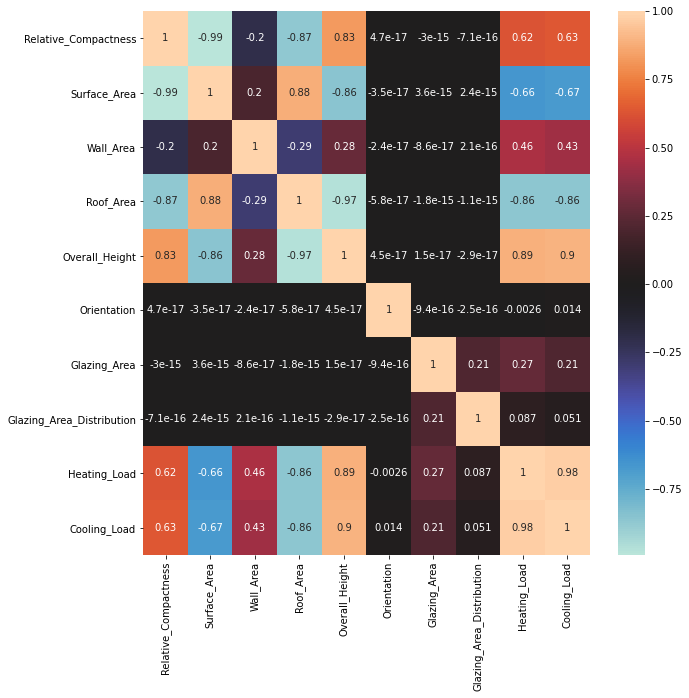

In [32]:
fig, ax = plt.subplots(figsize=(10,10)) 
sb.heatmap(data.corr(),center=0,annot=True,ax=ax)
plt.show()

Info about data

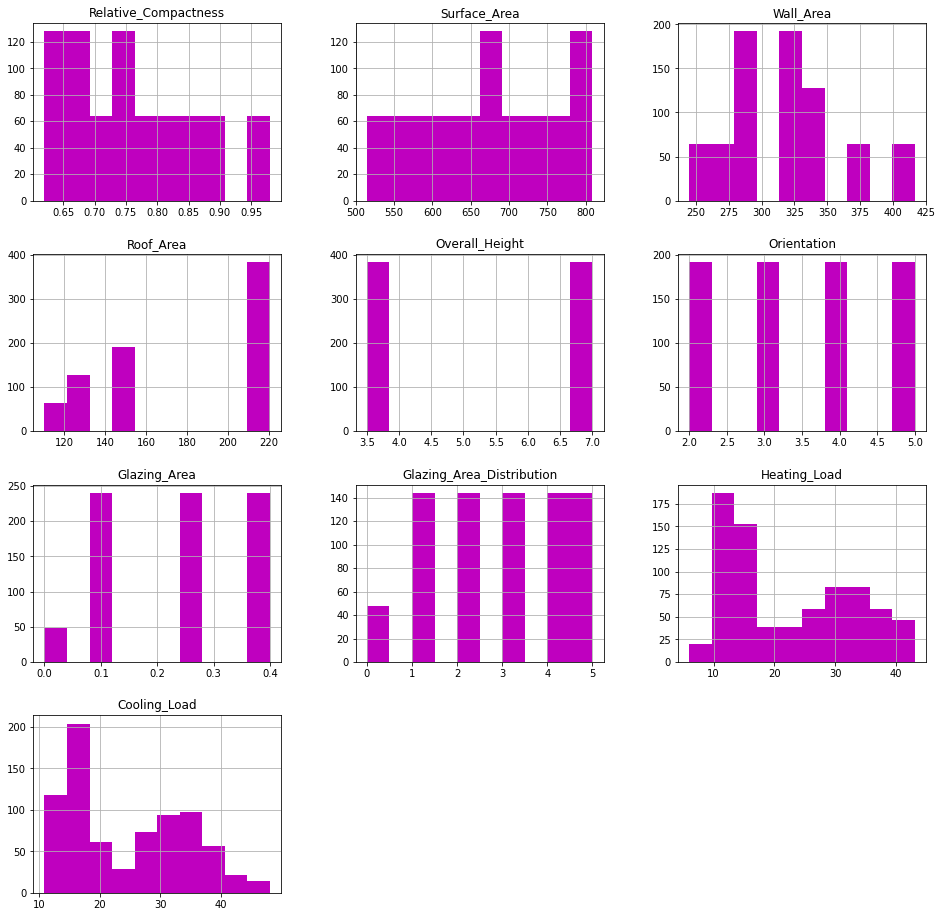

In [33]:
data.hist(figsize=(16,16),color="m")
plt.show()

Separating dependent and independent data

In [34]:
# Heating load can be changed to Cooling load
independet = data["Heating_Load"]
dats = data.drop(["Heating_Load","Cooling_Load"],axis=1)

Train and Test data splitting

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dats, independet,test_size=0.3,random_state=1)

KMeans - Creating pipeline for testing on multiple clusters

In [46]:
from sklearn.cluster import KMeans
estimators = [('k_means_8', KMeans(n_clusters=7)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_5', KMeans(n_clusters=5, n_init=1,
                                               init='random'))]

Get best result from estimators

In [58]:
for x, est in estimators:
    print(x,":")
    model = est.fit(X_train,y_train)
    prd =model.predict(X_test,y_test)
    RMSE_k = np.sqrt(mean_squared_error(y_test,prd))
    print(RMSE_k)
    

k_means_8 :
22.449256806603447
k_means_3 :
24.999746258452564
k_means_5 :
23.14991508404012


Set best as final model

In [62]:
final_model = estimators[0][1]
pred = final_model.fit(X_train,y_train)
prd = pred.predict(X_test,y_test)


RMSE for k means

In [63]:
from sklearn.metrics import mean_squared_error, confusion_matrix
print(mean_squared_error(y_test, model.predict(X_test)))
RMSE_kmeans = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

535.9185683982683


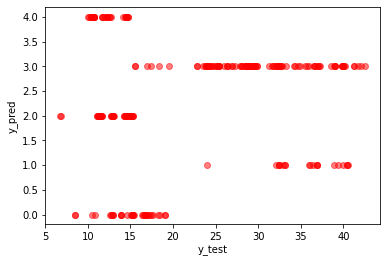

In [64]:
y_pred = model.predict(X_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.show()


Linear reg

In [57]:
from sklearn.linear_model import LinearRegression
regg = LinearRegression().fit(X_train,y_train)
regg.score(X_train,y_train)

0.9252690694398181

In [65]:
print(mean_squared_error(y_test, regg.predict(X_test)))
RMSE_linear = np.sqrt(mean_squared_error(y_test, regg.predict(X_test)))

10.818900591491163


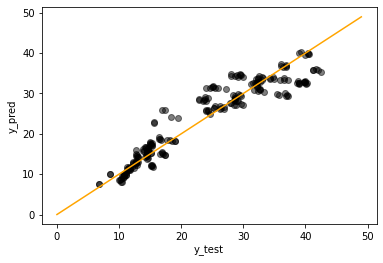

In [66]:
y_pred = regg.predict(X_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.plot([*range(0,50)],color="orange")
plt.scatter(y_test, y_pred, color='black', alpha=0.5)
plt.show()


Ridge Regression

In [67]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=5).fit(X_train,y_train)

In [68]:
pred = clf.predict(X_test)

In [69]:
print(mean_squared_error(y_test, regg.predict(X_test)))
RMSE_ridge = np.sqrt(mean_squared_error(y_test, pred))


10.818900591491163


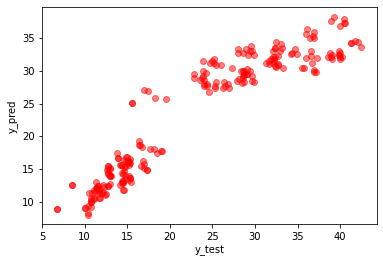

In [70]:
y_pred = clf.predict(X_test)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test, y_pred, color='red', alpha=0.5)
plt.show()


Comparison

In [71]:
RMSE_list = [RMSE_kmeans,RMSE_linear,RMSE_ridge]

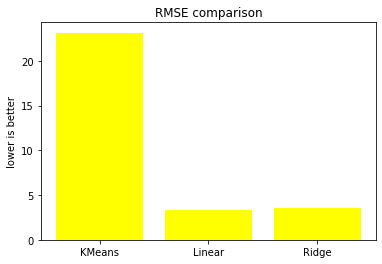

In [72]:
plt.title("RMSE comparison")
plt.bar(["KMeans","Linear","Ridge"],RMSE_list,color="yellow")
plt.ylabel("lower is better")
plt.show()